In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [98]:
df= pd.read_csv("D:\SHAYAN\ML\ML\code\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
print(df.shape)
print("---------------")
print(df.isnull().sum())

(303, 14)
---------------
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [101]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('output', axis=1)
y = df['output']                

model = RandomForestClassifier(random_state=42)
model.fit(X, y)
pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)

,Importance
cp,0.135346
thalachh,0.129879
caa,0.108091
thall,0.105813
oldpeak,0.102469
age,0.091921
chol,0.076270
trtbps,0.075079
exng,0.058675
slp,0.055157


In [ ]:
import seaborn as sns

plt.figure(figsize=(30,30))
sns.pairplot(df[['cp','thalachh','caa','thall','oldpeak','age','chol','output']], hue='output')
plt.show()

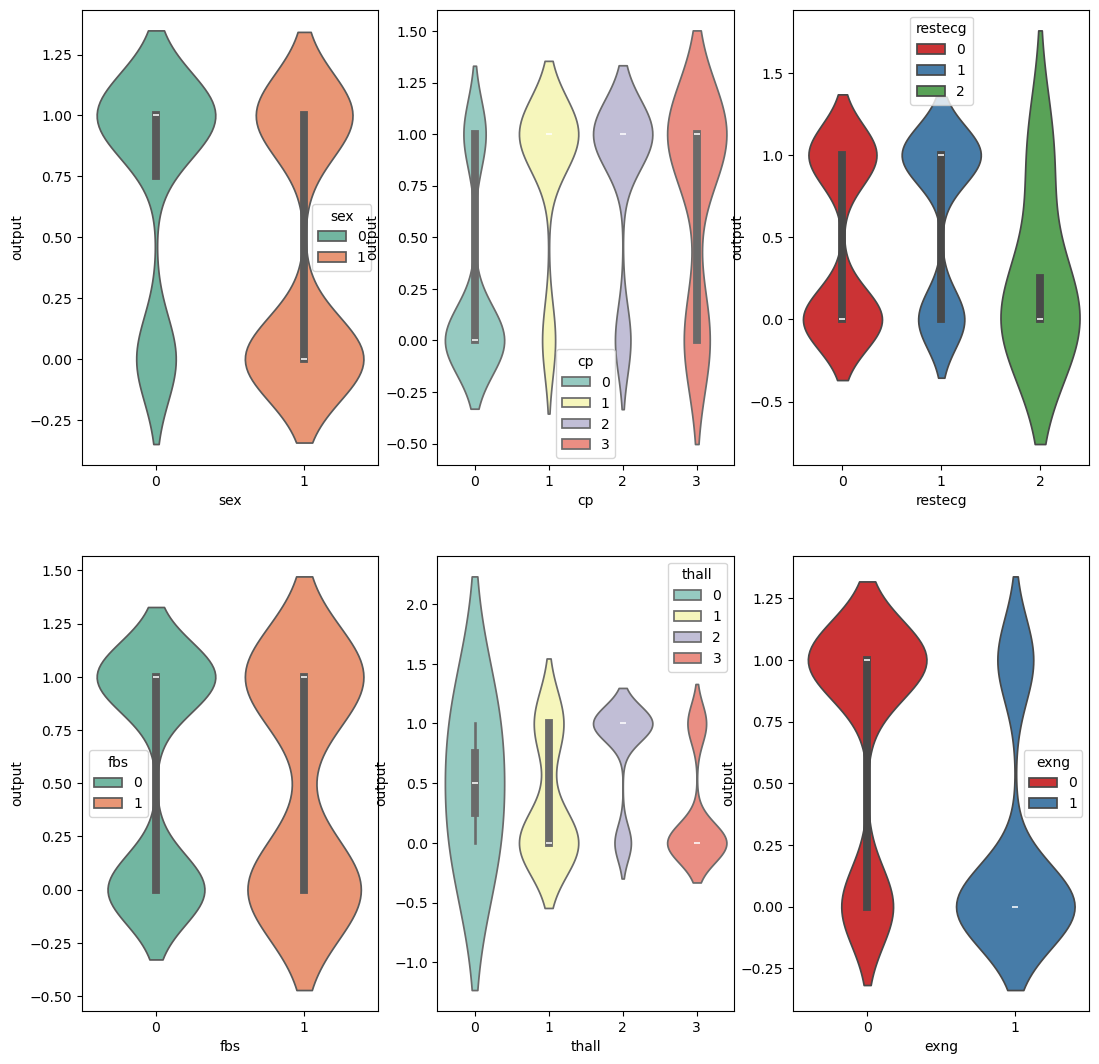

In [33]:
plt.figure(figsize=(13,13))
plt.subplot(2, 3, 1)
sns.violinplot(x='sex', y='output', data=df, hue='sex', palette='Set2')
plt.subplot(2, 3, 2)
sns.violinplot(x='cp', y='output', data=df, hue='cp', palette='Set3')
plt.subplot(2, 3, 3)
sns.violinplot(x='restecg', y='output', data=df, hue='restecg', palette='Set1')
plt.subplot(2, 3, 4)
sns.violinplot(x='fbs', y='output', data=df, hue='fbs', palette='Set2')
plt.subplot(2, 3, 5)
sns.violinplot(x='thall', y='output', data=df, hue='thall', palette='Set3')
plt.subplot(2, 3, 6)
sns.violinplot(x='exng', y='output', data=df, hue='exng', palette='Set1')
plt.show()

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [94]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=345,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42
)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=345, random_state=42)

In [95]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 86.89%
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



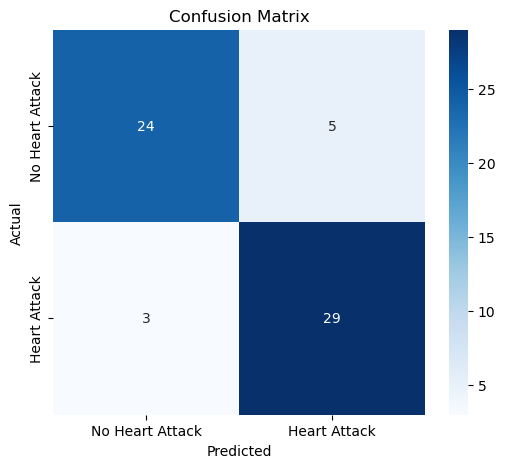

In [96]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_names = ['No Heart Attack', 'Heart Attack']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()